<a href="https://colab.research.google.com/github/u1331486/IS-4487-Labs/blob/main/Lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:

import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/superstore_retail_orders (1).csv')

print (df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

In [ ]:
print("\nColumns and Data Types:")
print(df.dtypes)


Columns and Data Types:
order_id              int64
order_date           object
order_year_month     object
customer_name        object
city                 object
state_province       object
quantity            float64
product_name         object
product_line         object
product_price       float64
dtype: object


In [ ]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
            order_id  order_date order_year_month    customer_name  \
count   56045.000000       56013            56013            56045   
unique           NaN         947               35            17343   
top              NaN  2022-03-01          2022-05  Fernando Barnes   
freq             NaN         306             5416               64   
mean    61668.066340         NaN              NaN              NaN   
std      7508.229651         NaN              NaN              NaN   
min     45079.000000         NaN              NaN              NaN   
25%     55644.000000         NaN              NaN              NaN   
50%     61869.000000         NaN              NaN              NaN   
75%     68097.000000         NaN              NaN              NaN   
max     74147.000000         NaN              NaN              NaN   

                  city             state_province       quantity  \
count            55571                      55571   56006.000000   
un

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
order_id              0
order_date           32
order_year_month     32
customer_name         0
city                474
state_province      474
quantity             39
product_name          0
product_line          0
product_price         0
dtype: int64


In [ ]:
print("\nUnique Values:")
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values}")


Unique Values:
order_id: 25163
order_date: 947
order_year_month: 35
customer_name: 17343
city: 11920
state_province: 54
quantity: 12
product_name: 131
product_line: 9
product_price: 45


In [ ]:
df['quantity'].fillna(df['quantity'].median(), inplace=True)


In [ ]:
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['state_province'].fillna(df['state_province'].mode()[0], inplace=True)


In [ ]:
print("\nMissing Values after Cleaning:")
print(df.isnull().sum())



Missing Values after Cleaning:
order_id             0
order_date          32
order_year_month    32
customer_name        0
city                 0
state_province       0
quantity             0
product_name         0
product_line         0
product_price        0
dtype: int64


In [ ]:
df.dropna(subset=['order_date', 'order_year_month'], inplace=True)


In [ ]:
print("\nMissing Values after Cleaning:")
print(df.isnull().sum())


Missing Values after Cleaning:
order_id            0
order_date          0
order_year_month    0
customer_name       0
city                0
state_province      0
quantity            0
product_name        0
product_line        0
product_price       0
dtype: int64


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [ ]:
numeric_columns = ['order_id', 'product_price', 'quantity']


In [ ]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')



In [ ]:
print(df.columns)


Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price'],
      dtype='object')


In [ ]:
df.dropna(inplace=True)


In [ ]:
print("\nData after Preparation:")
print(df.head())


Data after Preparation:
   order_id  order_date order_year_month  customer_name               city  \
0     51188  2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187  2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199  2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241  2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297  2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes 

In [ ]:
description = df.describe()
print(description)


           order_id       quantity  product_price
count  56013.000000   56013.000000   56013.000000
mean   61660.984914       3.347848    6194.634894
std     7504.524650     422.620157   35781.575484
min    45079.000000       1.000000       2.290000
25%    55641.000000       1.000000       7.950000
50%    61862.000000       1.000000     475.600000
75%    68084.000000       2.000000     914.620000
max    74147.000000  100000.000000  235481.000000


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

In [ ]:
sns.set(style="whitegrid")


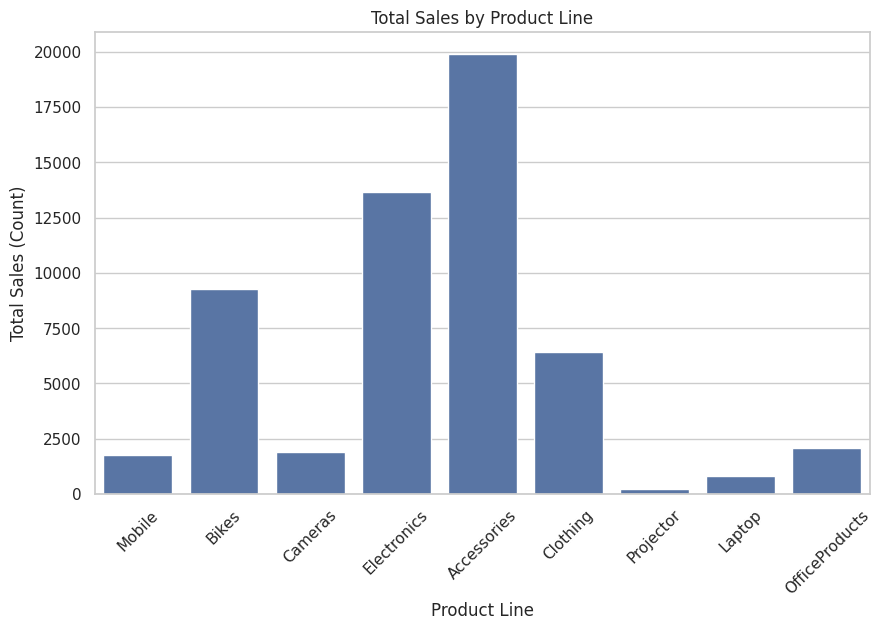

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product_line')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales (Count)')
plt.xticks(rotation=45)
plt.show()

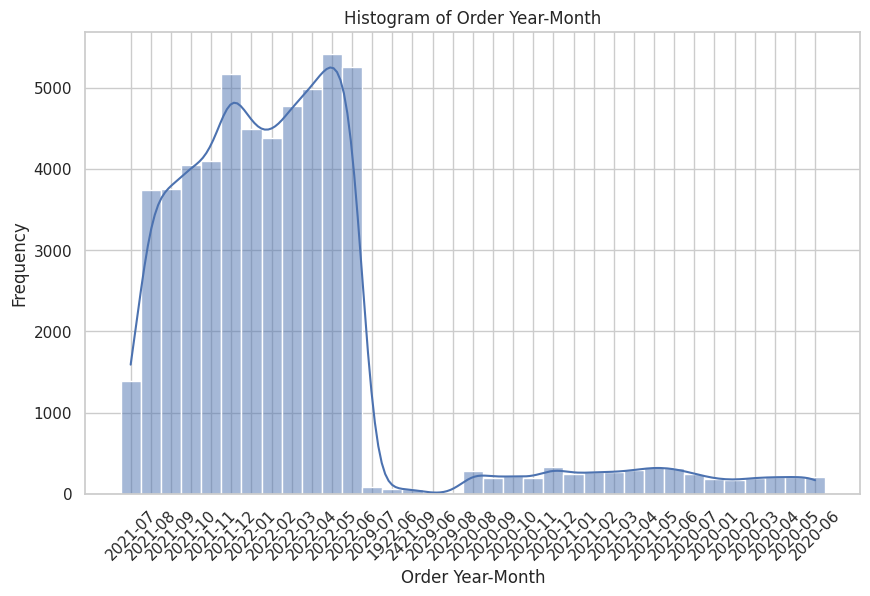

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['order_year_month'], bins=20, kde=True)
plt.title('Histogram of Order Year-Month')
plt.xlabel('Order Year-Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


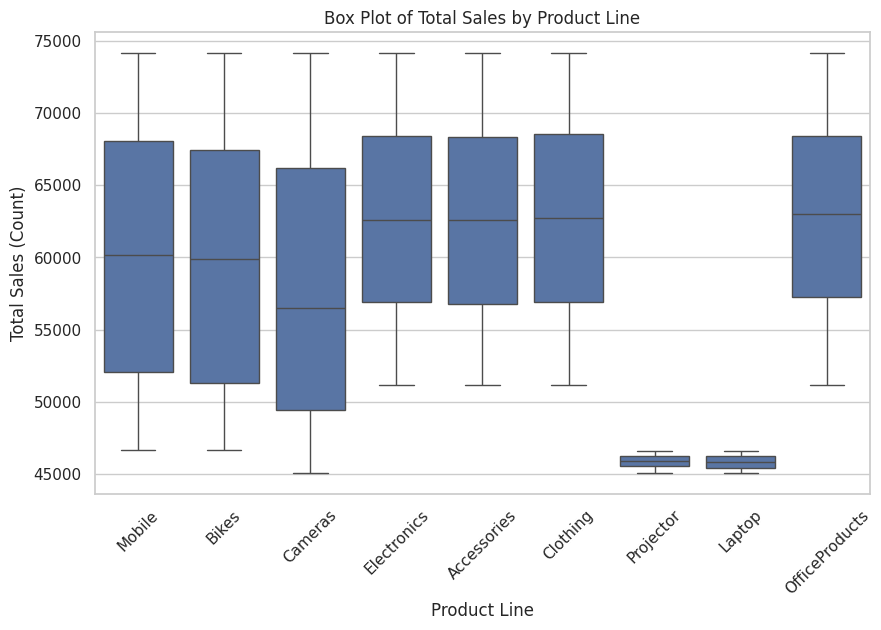

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_line', y='order_id', data=df)
plt.title('Box Plot of Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales (Count)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df.columns)


Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price'],
      dtype='object')


True


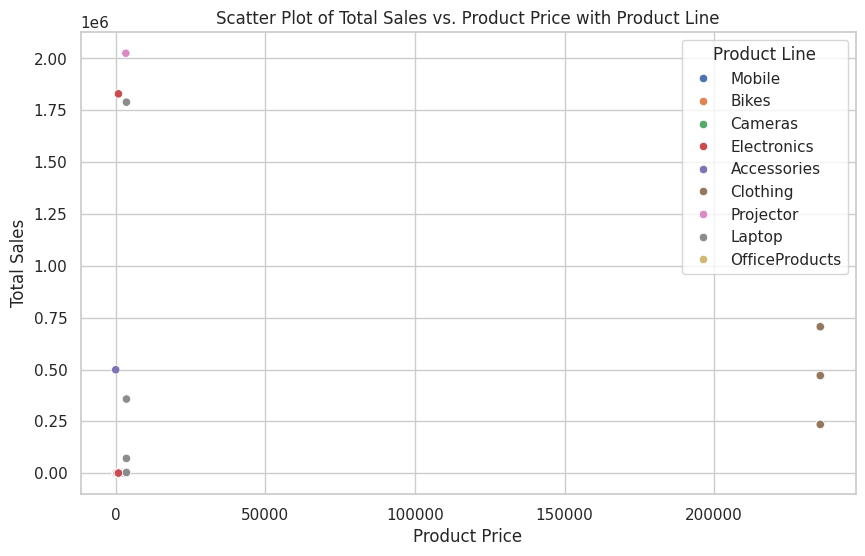

In [ ]:
print('total_sales' in df.columns)

if 'total_sales' not in df.columns:
    df['total_sales'] = df['quantity'] * df['product_price']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_price', y='total_sales', hue='product_line', data=df)
plt.title('Scatter Plot of Total Sales vs. Product Price with Product Line')
plt.xlabel('Product Price')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['month_of_year'] = df['order_date'].dt.month



In [ ]:
monthly_sales = df.groupby('month_of_year')['order_id'].count().reset_index()


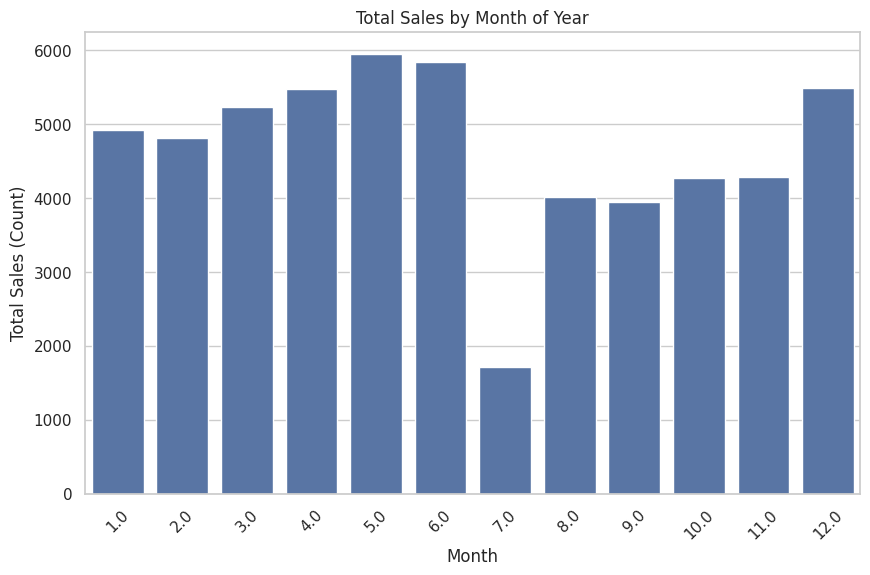

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='month_of_year', y='order_id')
plt.title('Total Sales by Month of Year')
plt.xlabel('Month')
plt.ylabel('Total Sales (Count)')
plt.xticks(rotation=45)
plt.show()
## How does the month of year affect sales?


In [ ]:
# What are the best states for sales?
state_sales = df.groupby('state_province')['order_id'].count().reset_index()
state_sales = state_sales.sort_values(by='order_id', ascending=False).head(10)


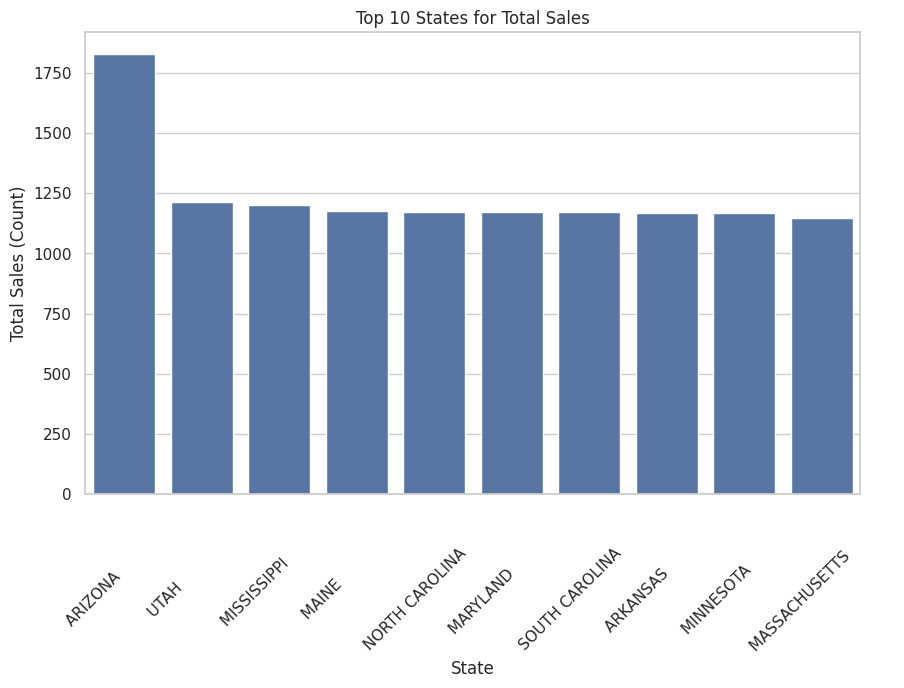

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=state_sales, x='state_province', y='order_id')
plt.title('Top 10 States for Total Sales')
plt.xlabel('State')
plt.ylabel('Total Sales (Count)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# What are the best and worst products for sales?
product_sales = df.groupby('product_name')['order_id'].count().reset_index()
product_sales = product_sales.sort_values(by='order_id', ascending=False)
best_products = product_sales.head(10)
worst_products = product_sales.tail(10)


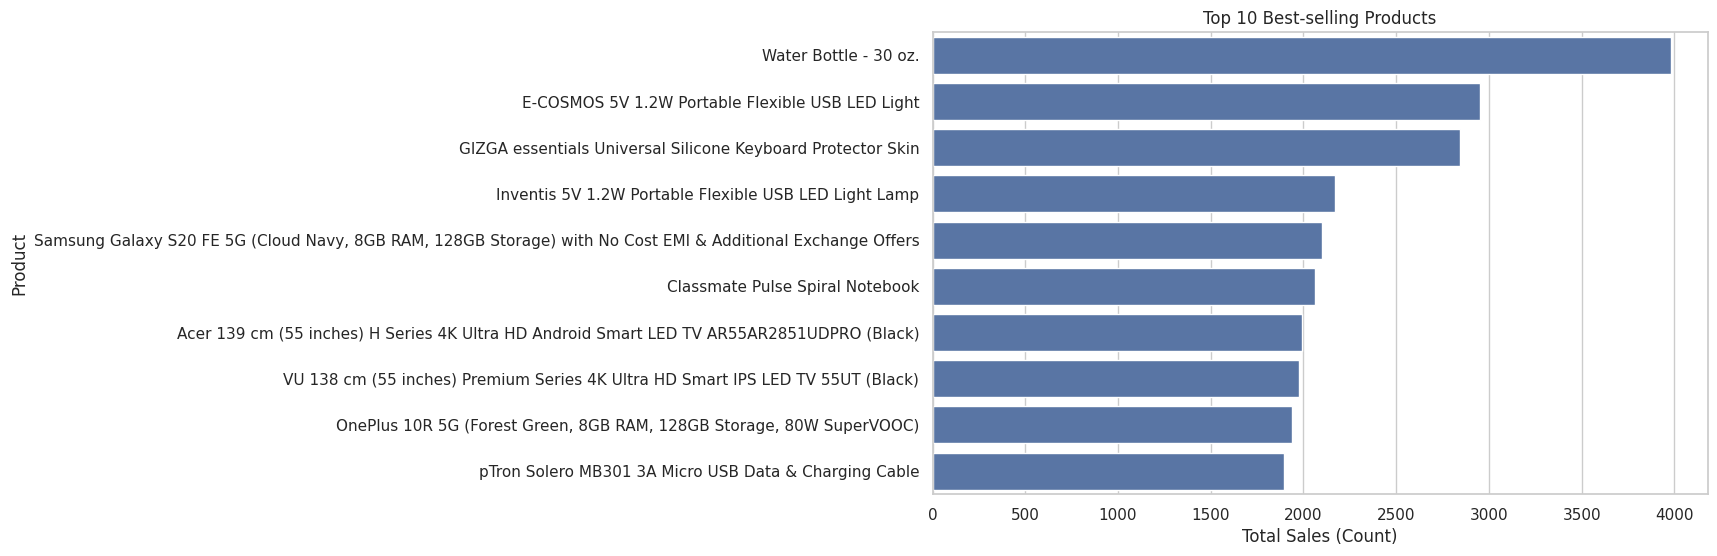

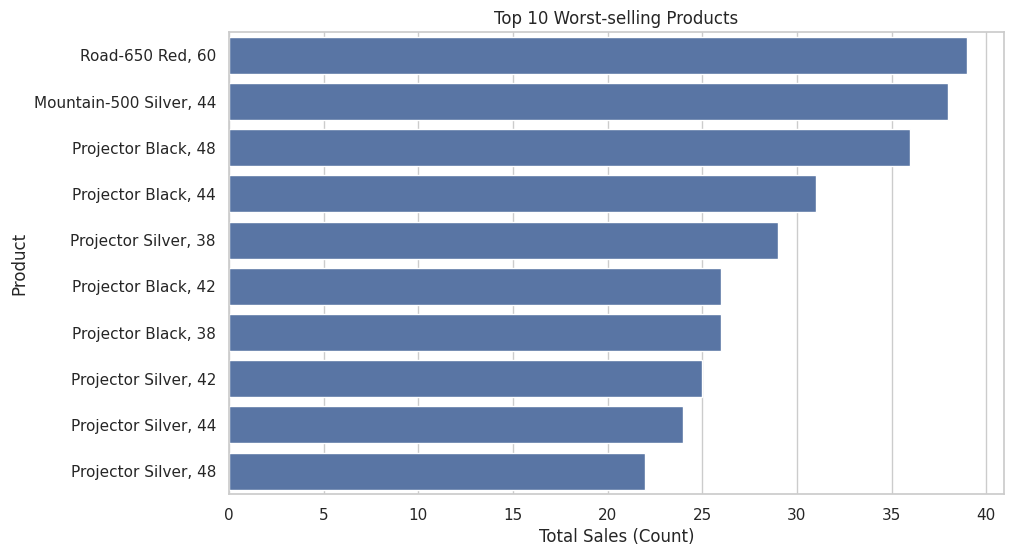

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_products, x='order_id', y='product_name')
plt.title('Top 10 Best-selling Products')
plt.xlabel('Total Sales (Count)')
plt.ylabel('Product')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=worst_products, x='order_id', y='product_name')
plt.title('Top 10 Worst-selling Products')
plt.xlabel('Total Sales (Count)')
plt.ylabel('Product')
plt.show()

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

In [ ]:

df['total_sales'] = df['quantity'] * df['product_price']
relevant_columns = ['order_id', 'product_price', 'quantity', 'total_sales']



<Figure size 1200x800 with 0 Axes>

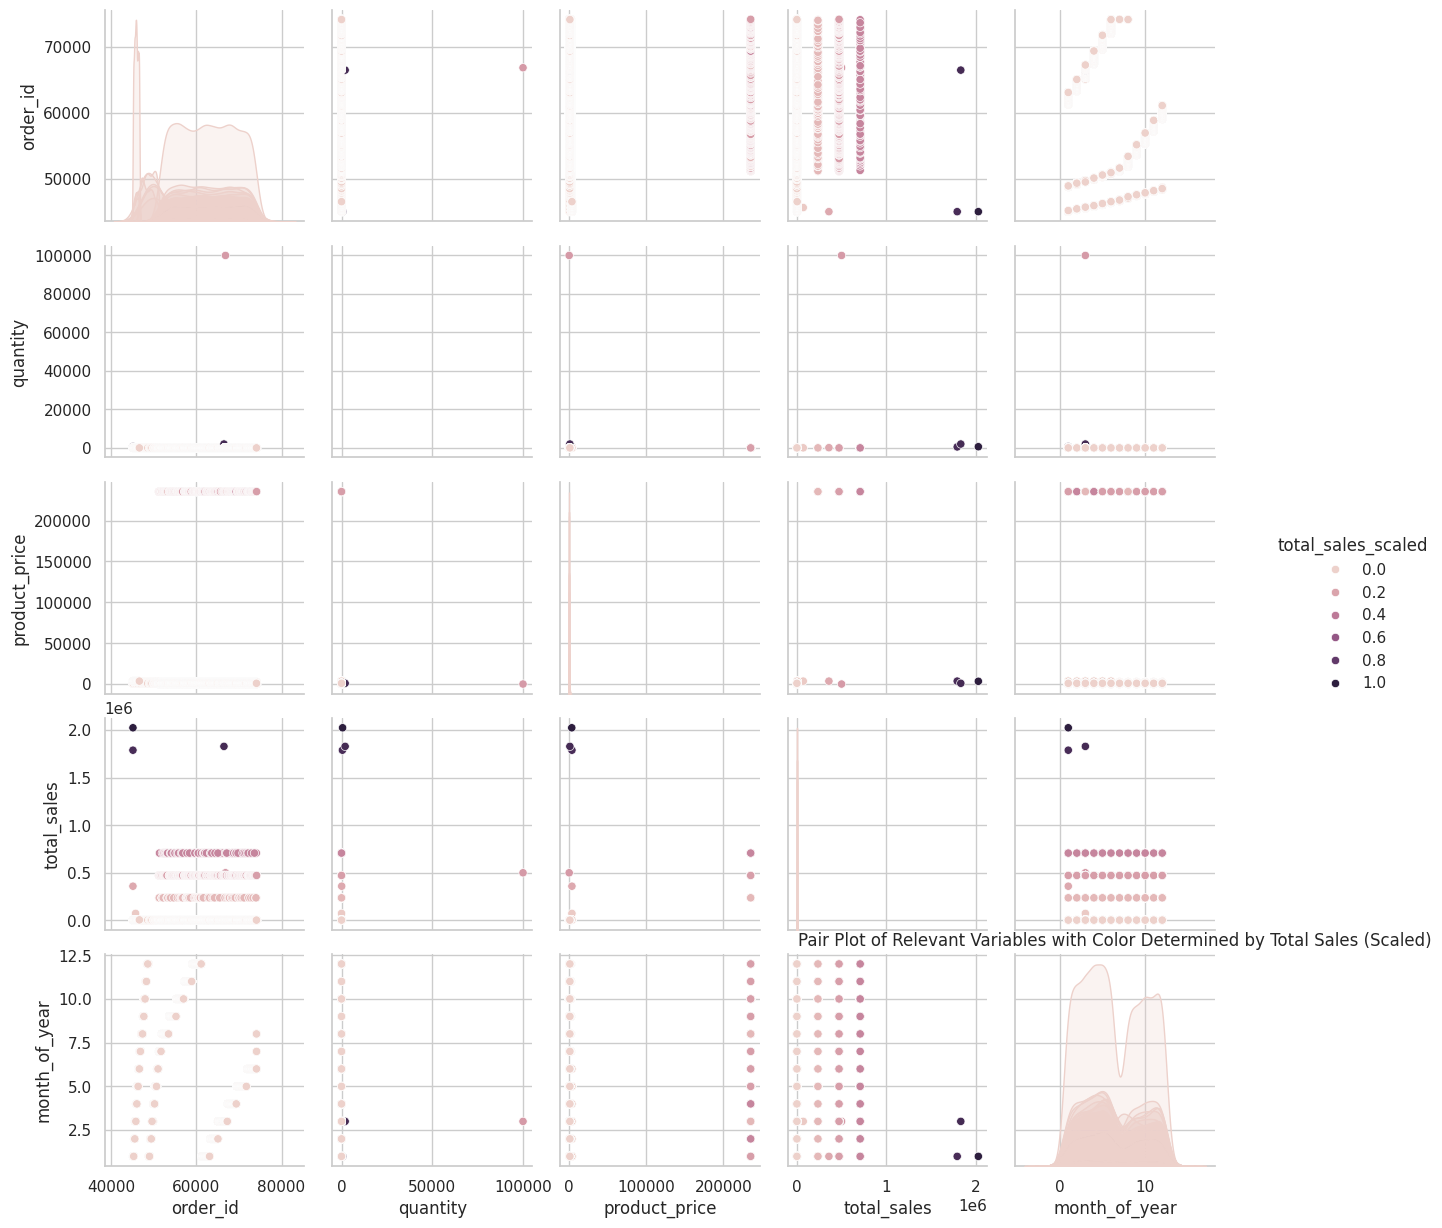

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the 'total_sales' column
scaler = MinMaxScaler()
df['total_sales_scaled'] = scaler.fit_transform(df[['total_sales']])

# Plot the pair plot with the scaled 'total_sales'
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='total_sales_scaled')
plt.title('Pair Plot of Relevant Variables with Color Determined by Total Sales (Scaled)')
plt.show()